## Applied Machine Learning and Deep Learning MS4S16 
## Assessment 1 - Predicting Covid with ML Agorithms.
Tina Crocker 01078224

**Report Introduction.**

A global survey used Facebook to measure the immediate effect of different national policies on Covid symptoms and cases, to compare the health effects, and to optimise global policy development, in order to control the virus and prevent illness and deaths.

The research question chosen to investigate in this report is **Q. What symptom(s) are the earliest to confidently indicate a Covid like illness, in order to treat it early and prevent deaths?**

The Target or Dependant Variable might be the number of cases or deaths related to Covid 19. 

The Predictor or Independant variables might be the symptoms, location, pre-existing medical conditions.

Both supervised and unsupervised models will be used and tested for effectiveness of predicting Covid from the sypmtom variables.


**Methodology**

1. Exploratory Data Analysis is conducted using using pandas package, basic Python functions, and matplotlib in order to gain a better understanding and visualisation of the variables.

2. Data preprocessing is completed using the scikit-learn.preprocessing package and functions covering Standard_scaler, numpy.Log10 transformation, and PCA - Principal Component Analysis.

3. Once the data is cleaned, unsupervised analysis is modelled using scikit-learn's KMeans clustering function, and an Agglomerative Hierarchical Cluster is modelled to begin to reduce dimensionality and to predict outcomes from the predictor variables. The effectiveness of the unsupervised models is evaluated using sklearn.metrics package.

4. A supervised learning model is developed, first using a classic linear regression model, and then a logistic regression model for classification of the results. The effectiveness of the supervised models is again evaluated using sklearn.metrics package.

5. The overall effectiveness of the differing models in answering the research question is critcally analysed and summarised.

**Summary**







**Note**
UMD = University of Maryland.          CMU = Carnegie Mellon University.


## <font color = blue> Task A1 - Exploratory Data Analysis. </font>

#### <font color = blue> Symptoms by US States. </font> <br>
Reading the US Covid Symptom dataset from CMU into a dataframe called State.
The overall US state smoothed data was chosen because it holds data on over 100 symptoms or indicators. 
The data points have all been smoothed, averaged over 7 days prior, to give a deeper, more stable result.


In [377]:
State = pd.read_csv('overall-state-smoothed.csv')

In [378]:
#import pandas
import pandas as pd

In [379]:
State.head()


,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,04/01/2021,ak,female,18-34,142,2.8169,2.8169,4.2254,1.4085,27.1315,...,0.0,2.7010,0.8389,4.3270,22.5092,0.6342,1.9662,7.1869,62.5269,12.3412
1,03/01/2021,ak,female,18-34,130,3.0769,3.0769,4.6154,1.5385,28.3173,...,0.0,3.6825,0.0000,2.2144,20.0254,0.6928,2.1477,7.5217,68.8700,12.2354
2,02/01/2021,ak,female,18-34,116,3.4483,3.4483,4.3103,2.5862,30.3150,...,0.0,1.4763,0.0000,2.5365,19.5448,0.0000,2.4069,7.0974,72.1435,9.6518
3,01/01/2021,ak,female,18-34,119,3.3613,3.3613,4.2017,2.5210,31.5408,...,0.0,2.2748,0.9303,3.3082,25.2423,0.0000,2.4872,7.9263,65.4238,12.7902
4,31/12/2020,ak,female,18-34,113,1.7699,1.7699,1.7699,0.8850,27.2736,...,0.0,1.7223,0.9797,5.2842,25.1198,0.0000,0.8800,6.5537,64.5296,12.9009


**Figure 1.2 Overall-state-smoothed dataframe header.**

Looking at the dataframe, we see the rows are indexed daily and are already in bins of US State, gender and age buckets.

The variable 'pct_cli' tells us that on Jan 4th 2021, 2.8% of 18-34 year olds in Alaska had Covid like illnesses.

In [380]:
State.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162691 entries, 0 to 162690
Columns: 105 entries, date to smoothed_pct_multiple_medical_conditions_weighted
dtypes: float64(100), int64(1), object(4)
memory usage: 130.3+ MB


162,691 rows in the dataframe, with 105 columns!
100 have float values, 1 is an integer and 4 are objects.
(These are the first 5 categorical values e.g. Gender.) 

In [381]:
State.isnull().sum()

date                                                 0
state_code                                           0
gender                                               0
age_bucket                                           0
summed_n                                             0
                                                    ..
smoothed_pct_chronic_lung_disease_weighted           0
smoothed_pct_kidney_disease_weighted                 0
smoothed_pct_autoimmune_disorder_weighted            0
smoothed_pct_no_above_medical_conditions_weighted    0
smoothed_pct_multiple_medical_conditions_weighted    0
Length: 105, dtype: int64

It appears there are no null values. 
Confirmed this by summing the number of nulls in each column.


In [382]:
State['age_bucket'].value_counts()


overall    41087
35-54      40842
55+        40658
18-34      40104
Name: age_bucket, dtype: int64

A count of the age buckets shows that we have 3 distinct age categories, or buckets. 

**18-34, 35-54 and 55+**
The CMU definitions text explains that overall is the aggregation of all ages, so can be ignored as it duplicates the count of the three bins.

It was envisaged that a comparison of clusters of ages buckets with likelihood of contracting Covid could be modelled. Only three age buckets limits the quality and granularity of the age-related correlation, so different correlations will be explored for better results.

In [383]:
US = State['state_code'].nunique()
print('The data contains {US} unique states. This might be a good comparison factor laterfor supervised learning.')


The data contains {US} unique states. This might be a good comparison factor laterfor supervised learning.


#### <font color = blue> Visualisations </font> <br>
Visualising the data for further identification of trends, patterns and groups. 

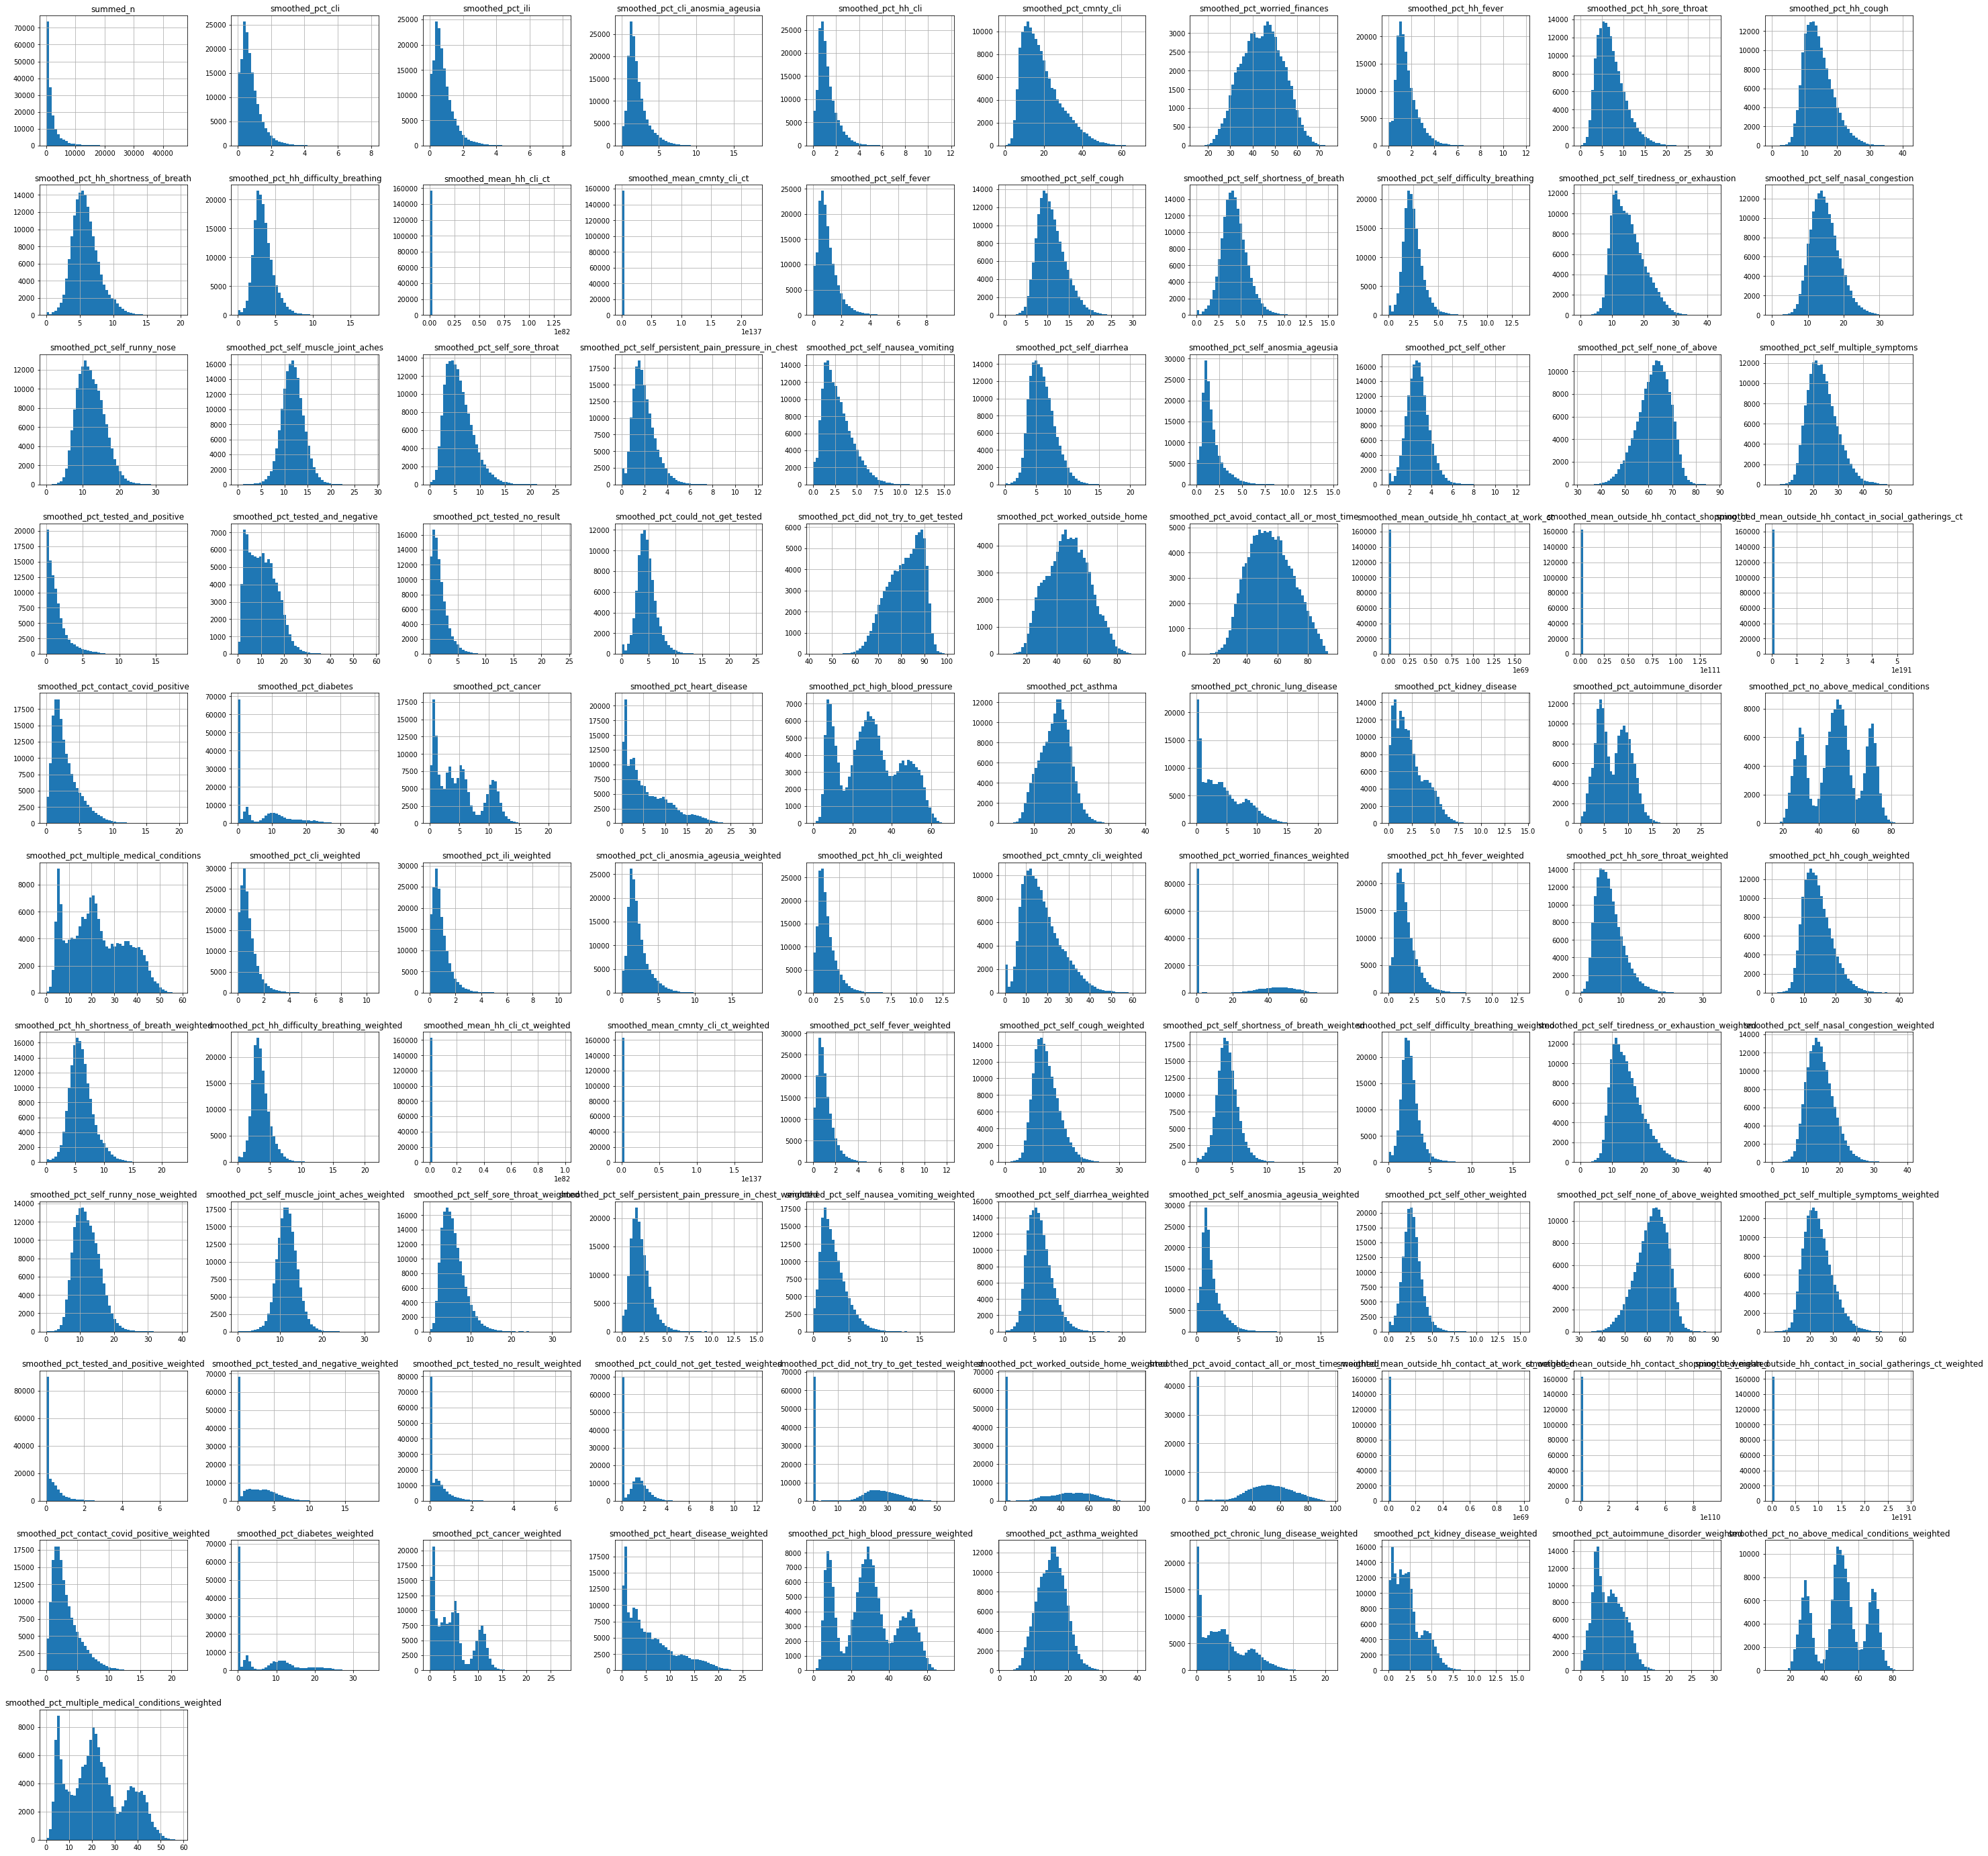

In [318]:
from matplotlib import pyplot as mpl
%matplotlib inline
State.hist(bins = 50, figsize = (50,50))
mpl.show()

**Figure 1.3. A Multivariate array of histograms for US Covid survey variables.**

From this, we can see that there is some pre-processing work to do for the best modeling outcome.

1.  All the x and y axis scale values differ, so scales will need to be standardised for an equal comparison.

2. Also, many of the plots appear to be skewed to the left,applying a log10 or square function might allow us to centralise the distribution and access all of the data.

3. Some trends have similar interesting patterns which might be quantified in clusters or feature reduction later.

4. There are too many variables to be effective so we will look at feature reduction. There appears to be duplication of variables.

Next other significant variables are investigated for the research question.

#### <font color = blue> Other Variables - Fatigue. </font> <br>
The research question we have chosen to investigate in this report is **Q. What symptom or category is the earliest to confidently indicate a Covid like illness, in order to treat it early and prevent deaths?**

The 'Zoe Covid Study', April 2021, https://covid.joinzoe.com/post/early-covid-signs indicated that Headache and Fatigue were the earliest signs, and correlated to 82% and 72% of positive Covid tests, so lets check that using these data sets.


Headache is not a symptom measured by any of the surveys, but Tiredness and Exhaustion is, to simplify, we will refer to that column as fatigue.


Column 5 of the US State symptom data gives the percentage of households with CLI (Covid Like Illness). This is investigated further as a potential Target Variable because we want to be able to predict if people will contract Covid from the symptoms including fatigue.

 ILI is Flu like illness and we now know that symptoms are very similar, and can be confused with each other until a test is taken. This is not investigated because it is almost a duplication of cli.


In [384]:
Fatigue = State['smoothed_pct_self_tiredness_or_exhaustion']
Fatigue.describe()

count    162684.000000
mean         15.197837
std           4.978497
min           0.000000
25%          11.318900
50%          14.434950
75%          18.288125
max          42.105300
Name: smoothed_pct_self_tiredness_or_exhaustion, dtype: float64

**Figure 1.4 Statistical summary of the Fatigue variable**
gives us 8 descriptive rows.

Interestingly the Max percentage experiencing fatigue is 42%. 

Given the Zoe Covid study, I expected this to be higher, however, the scales are not currently comparable.

The mean is 15% over 162,000 samples, which is skewed to the first quartile and will be addressed in the pre-processing step.



In [385]:
#Investigating the distribution of this Covid symptom with a histogram.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

Text(0.5, 1.0, 'Estimated percentage of people reporting that they have experienced tiredness or exhaustion in the past 24 hours.')

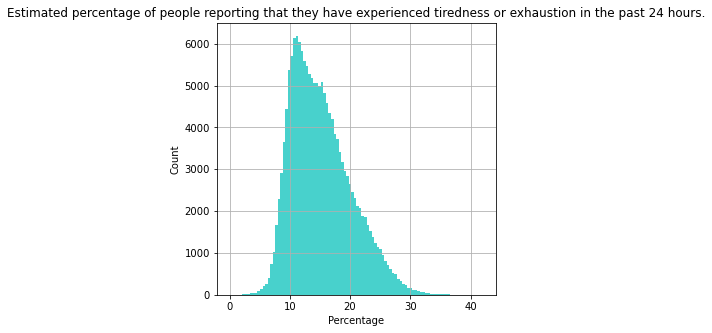

In [386]:
Fatigue.hist(bins = 100, figsize = (5,5), color='mediumturquoise')

# Adding extra features   
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.title ("Estimated percentage of people reporting that they have experienced tiredness or exhaustion in the past 24 hours.")


**Figure 1.5 Histogram of people self reporting Fatigue.**

This shows an even bell shaped distribution, and a early indication that up to 6000 samples show that 16 percent of 
people reported Fatigue. What other symptoms are predictors for the Machine Learning Algorithm? 

#### <font color = blue> Other Variables - Locations. </font> <br>
Investigating Covid death data, specifically locations to see if there is a relationshp to be explored further.
The data we use is 'US Deaths' from Johns Hopkins University.

In [387]:
Deaths = pd.read_csv('deaths_us.csv')
Deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,latitude,longitude,...,6/29/21,6/30/21,07/01/2021,07/02/2021,07/03/2021,07/04/2021,07/05/2021,07/06/2021,07/07/2021,Total
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,113,113,113,113,113,113,113,113,113,23280
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,314,315,315,315,315,315,315,315,316,64404
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,60,60,60,60,60,60,60,60,60,11745
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,64,64,64,64,64,64,64,64,65,13642
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,139,139,139,139,139,139,139,139,139,27104


**Figure 1.6 Header table of US Covid related Deaths.**

We can see that it gives us location co-ordinates, states and daily death rates. 
Adding an image of the US outline to aid comparison.
 

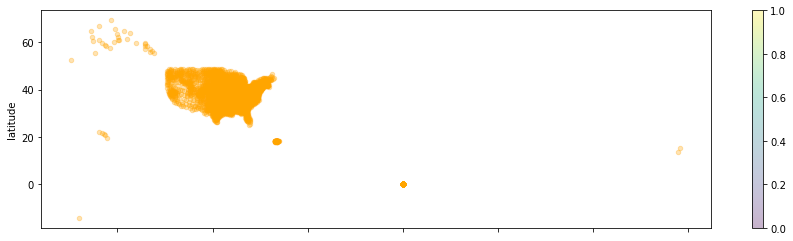

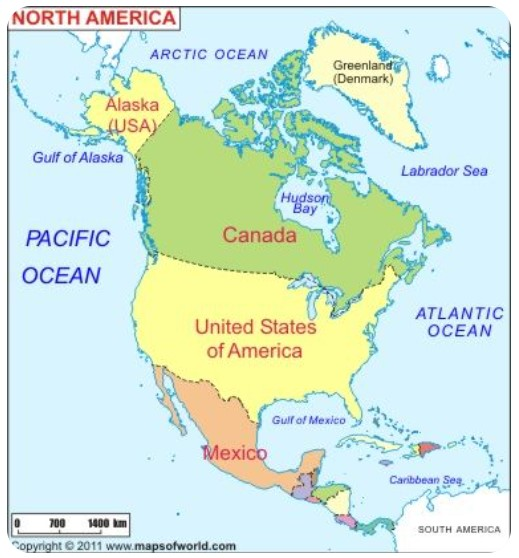

In [388]:
Deaths.plot(kind ='scatter', figsize = (15,4), x = 'longitude', y = 'latitude', 
             alpha = 0.3, color='Orange', colorbar=True)
plt.show()

from IPython.display import Image
PATH = "C:/Users/tina_/Downloads/"
Image(filename = PATH + "US outline.jpg", width=300, height=300)


**Figure 1.7 Scatter plot of the locations of deaths across the US, with a Reference Map**

We can see few deaths north in Alaska, Canada data is not included (Non-US).
Maximum number of deaths across the US is at a hotspot in South America, 
and many reported deaths are in Cuba and the Hawaiian islands.


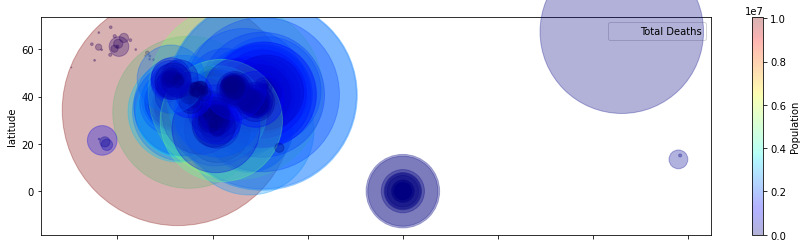

In [389]:
Deaths.plot(kind ='scatter', x = 'longitude', y = 'latitude', 
             alpha = 0.3, 
            s = Deaths['Total']/100,
            label = 'Total Deaths',
            figsize=(15,4),
            c = 'Population',
            cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()



**Fig 1.8 Colour Map of location of Deaths by Population.** 

The colour map or cmap immediately indicates that measured deaths across the US are most dense in the North West, and less prevalent in the East.

Also a High death count vs a low population marked by the Purple zone in the South, is interesting to investigate further.

The initial EDA showed that the Death related variables are not aligned with the Covid Symptom data by state as there is not a unique identifier in both, making any correlations merely assuptions. Therefore it is decided to use only the Symptom data for modelling.

#### <font color = blue> Other Variables - Covid Like Illness (cli). </font> <br>

Returning to the Symptom dataset to investigate cli as a potential target variable,
because the research is more concerned with identifying cases before they become deaths.

In [390]:
Covid = State['smoothed_pct_cli']
Covid.describe()

count    162684.000000
mean          0.784899
std           0.629500
min           0.000000
25%           0.371700
50%           0.639300
75%           1.043300
max           8.064500
Name: smoothed_pct_cli, dtype: float64

**Fig 1.9.1 Statistical Summary of cli**

Percentage of cli is a mean of 0.7% over 12000 samples indicating skewness to be corrected. 


Text(0.5, 1.0, 'Estimated percentage of people reporting that they have experienced tiredness or exhaustion in the past 24 hours.')

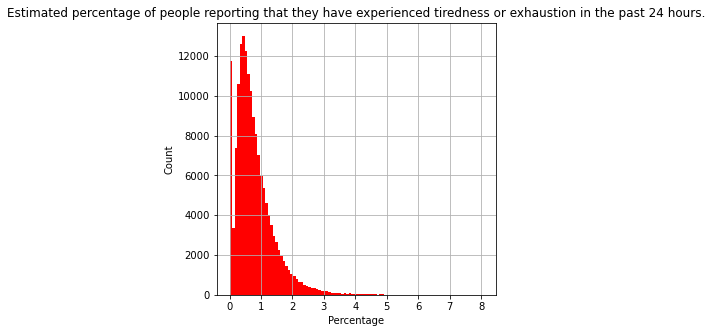

In [391]:
Covid.hist(bins = 100, figsize = (5,5), color='red')
# Adding extra features   
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.title ("Estimated percentage of people reporting that they have experienced tiredness or exhaustion in the past 24 hours.")

**Figure 1.9.2 Percentage of covid like illnesses reported.**

This visualises the heavy skew to the left with the 50th centile being at 0.6%
The min shows 0 but the bell shaped curve would indicate that data is in the negative axis here. 
The variable might benefit from transformation.
The max is just 8% showing cli, compared with 42% maximum with Fatigue.

#### <font color = blue> Task A1 EDA Summary. </font> <br>

The variables in the Covid Deaths data are not aligned with the Covid Symptom data by state as there is not a unique identifier in both, making any correlations merely assuptions. Therefore it is decided to use only the Symptom data for modelling.

Within the Symptom data, percentage of cli is a mean of 0.7% over 12000 samples.
While Fatigue had a mean of 15% over just 50,000 samples.
Although the variables are not directly linked to each other by State or date yet, this overview supports the hypothesis that fatigue is a strong early indicator of Covid.
It could also be explained by many other factors causing fatigue that are un-related to Covid, so other all variables should be analysed.

On reflection, the scaling and the skewness need to be corrected in the variables before they can be sucessfully processed, first looking to remove any redundant features.

## <font color = blue> Task A2 - Data Pre-Processing. </font>

Thousands of variables are available describing Covid, and the EDA has allowed us to understand it better, and to focus on certain of symptoms, fatigue, cli and not deaths or age buckets. 


Next we need to refine the data to enable us to find features that will show us a correlation and enable us to predict which will contribute to CLI or deaths.

Principal Component Analysis (PCA) will reducce that number to only variables that help us find the main (or principal) predictor variables. They are not linked with the dependant variable and therefore would be a component of an unsupervised machine learning algorithm.


#### <font color = blue> Missing Value Imputation. </font> <br>

In [392]:
# Checking if there are any null values that need replacing with imputation by counting number of 'NA's in the database.

Var = State.isna().sum()
(Var>0).sum()

32

There are 32 out of 105 columns with NaN values, this is 33% of the data so might be too significant to drop them all.
Double checking in the .csv file it can be seen that 50% of the columns are weighted and 50% are the exact same values but not weighted.


As this is duplicated or redundant infomation, we have decided to only use the weighted version, because this has already undergone a study and is weighted to better represent the target population as a whole.


Therefore we will drop columns 5 to 50. and change the source file to State_weight.

In [393]:
State_weight = State.drop(State.iloc[:, 0:55], axis = 1)
##print(State_weight)


In [394]:
#We can see that this has also eliminated the NaN values.

Var = State_weight.isna().sum()
(Var>0).sum()


0

#### <font color = blue> Scaling. </font> <br>

Although the variables are a percentage, the scales are not all the same, so they need to be standardised to be correct in the ML algorithm, if not they would produce inaccurate outputs.

The Scikit-learn package StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. All the values divided by the standard deviation.

In [395]:
State_weight.head()

,smoothed_pct_cli_weighted,smoothed_pct_ili_weighted,smoothed_pct_cli_anosmia_ageusia_weighted,smoothed_pct_hh_cli_weighted,smoothed_pct_cmnty_cli_weighted,smoothed_pct_worried_finances_weighted,smoothed_pct_hh_fever_weighted,smoothed_pct_hh_sore_throat_weighted,smoothed_pct_hh_cough_weighted,smoothed_pct_hh_shortness_of_breath_weighted,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,3.0180,3.0180,4.4677,1.4840,26.4251,57.4654,2.3229,10.2901,14.7296,7.0231,...,0.0,2.7010,0.8389,4.3270,22.5092,0.6342,1.9662,7.1869,62.5269,12.3412
1,3.2966,3.2966,4.8801,1.6210,27.3727,56.0248,1.6210,8.0775,15.3736,7.6714,...,0.0,3.6825,0.0000,2.2144,20.0254,0.6928,2.1477,7.5217,68.8700,12.2354
2,3.2234,3.2234,4.0609,2.2499,27.3265,54.5515,2.2499,7.3010,17.9263,4.9013,...,0.0,1.4763,0.0000,2.5365,19.5448,0.0000,2.4069,7.0974,72.1435,9.6518
3,3.1421,3.1421,3.9585,2.1931,27.2371,58.2551,2.1931,7.1169,16.8834,6.2627,...,0.0,2.2748,0.9303,3.3082,25.2423,0.0000,2.4872,7.9263,65.4238,12.7902
4,1.4441,1.4441,1.4441,0.4447,21.5910,56.7982,0.4447,3.0311,12.5402,3.6644,...,0.0,1.7223,0.9797,5.2842,25.1198,0.0000,0.8800,6.5537,64.5296,12.9009


**Fig 1.2.1 Header table of US Symptoms before scaling.**

In [396]:
from sklearn.preprocessing import StandardScaler as ss

In [397]:
#Fitting the scaler
State_ss = ss().fit_transform(State_weight)

C:\Users\tina_\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1015: RuntimeWarning: overflow encountered in square
  temp **= 2
C:\Users\tina_\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1021: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction ** 2 / new_sample_count
C:\Users\tina_\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1021: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction ** 2 / new_sample_count
C:\Users\tina_\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:80: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [398]:
type(State_ss )

numpy.ndarray

In [399]:
#Finally Transforming the scaled array back to a dataframe and keeping the original column names.
State_ss = pd.DataFrame(State_ss, columns = State_weight.columns)
State_ss.head()

,smoothed_pct_cli_weighted,smoothed_pct_ili_weighted,smoothed_pct_cli_anosmia_ageusia_weighted,smoothed_pct_hh_cli_weighted,smoothed_pct_cmnty_cli_weighted,smoothed_pct_worried_finances_weighted,smoothed_pct_hh_fever_weighted,smoothed_pct_hh_sore_throat_weighted,smoothed_pct_hh_cough_weighted,smoothed_pct_hh_shortness_of_breath_weighted,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,3.163942,3.030127,1.566850,0.192888,0.992892,1.636831,0.648720,0.907904,0.070525,0.444491,...,-0.851568,-0.562221,-0.974575,-1.620836,1.809093,-1.017941,-0.196139,0.219208,0.897860,-0.786377
1,3.567026,3.421008,1.851399,0.340607,1.096487,1.574733,-0.027921,0.251983,0.212610,0.751282,...,-0.851568,-0.306439,-1.136018,-1.758666,1.191539,-1.001262,-0.087778,0.321572,1.330637,-0.794898
2,3.461119,3.318307,1.286164,1.018710,1.091436,1.511225,0.578347,0.021791,0.775810,-0.559593,...,-0.851568,-0.881383,-1.136018,-1.737652,1.072046,-1.198457,0.066972,0.191844,1.553982,-1.002966
3,3.343493,3.204241,1.215510,0.957466,1.081663,1.670872,0.523591,-0.032785,0.545716,0.084653,...,-0.851568,-0.673291,-0.956986,-1.687304,2.488632,-1.198457,0.114913,0.445277,1.095510,-0.750217
4,0.886794,0.821911,-0.519383,-0.927724,0.464412,1.608071,-1.161888,-1.244012,-0.412520,-1.144923,...,-0.851568,-0.817274,-0.947479,-1.558386,2.458175,-1.198457,-0.844632,0.025610,1.034500,-0.741302


**Fig 1.2.2 Header table of US Symptoms after scaling.**

In [400]:
# Also removed this 1 column because it's more of a social situation than a sympton with too many null values.

State_ss = State_ss.drop('smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted', 1)

C:\Users\tina_\AppData\Local\Temp/ipykernel_8204/1349275561.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  State_ss = State_ss.drop('smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted', 1)


In [401]:
Covid = State_ss['smoothed_pct_cli_weighted']
Covid.describe()

count    1.626910e+05
mean    -1.955835e-15
std      1.000003e+00
min     -1.202557e+00
25%     -6.471230e-01
50%     -2.305839e-01
75%      3.961780e-01
max      1.386027e+01
Name: smoothed_pct_cli_weighted, dtype: float64

It can be seen that the Covid column has a mean skewed to the left, which will be corrected using StandardScaler.

In [402]:
import numpy as np
(np.log10(Covid)).describe()

C:\Users\tina_\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    63207.000000
mean        -0.295302
std          0.558191
min         -4.408910
25%         -0.585577
50%         -0.210557
75%          0.090230
max          1.141772
Name: smoothed_pct_cli_weighted, dtype: float64

After scaling and transforming the Covid target variable to Log10 we can see that the mean has shifted to close to Zero, reducing the skewness.

Text(0.5, 1.0, 'Estimated percentage of people reporting Covid like symptoms')

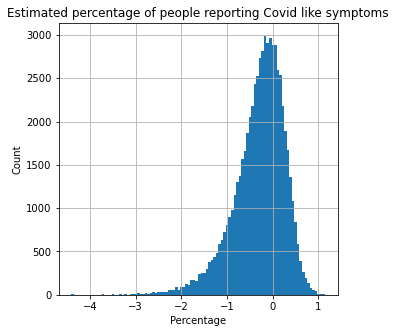

In [403]:
import matplotlib.pyplot as plt
(np.log10(Covid)).hist(bins=100, figsize=(5,5))
plt.xlabel('Percentage')
plt.ylabel("Count")
plt.title ("Estimated percentage of people reporting Covid like symptoms")


**Figure 1.2.3**

After scaling and transforming the Covid target variable to Log10, we can see that the mean has shifted to close to Zero, sucesfully reducing the skewness, and revealing values down to -4%

#### <font color = blue> Feature Engineering - PCA. </font> <br>
<font > Now useing the sklearn.decomposition.PCA package in python to reduce features and uncover more relationships. </font>

In [404]:
 from sklearn.decomposition import PCA

In [405]:
# # make an instance of the model
pca = PCA(n_components = 0.7)

In [406]:
#Here the scaled dataframe is fit and transformed to the preset 0.7 component.
State_ss_pca = pca.fit_transform(State_ss)


In [407]:
#Resulting in 5 Principal Components.
pca.n_components_

5

In [421]:
#Converting the PCA array to a pandas data frame.
State_ss_pca = pd.DataFrame(State_ss_pca, columns = ['PC1','PC2','PC3','PC4','PCA5'])
State_ss_pca.head()

,PC1,PC2,PC3,PC4,PCA5
0,6.352516,-0.630467,-1.869645,0.136055,-0.126396
1,7.328880,-0.208920,-1.286545,0.064770,-0.110798
2,6.983497,-1.309079,-1.954432,-0.472349,-0.119811
3,7.930914,-0.880474,-0.824260,-1.637436,-0.107383
4,2.309492,-2.788478,-2.395269,-3.584621,-0.078586


**Fig 1.2.4 PCA Components.**

In [409]:
#amount of variance between components, which are all far from 1 and 
#show a significant level of variance between clusters.
pca.explained_variance_ratio_

array([0.36846866, 0.1689355 , 0.09952677, 0.06039768, 0.04081739])

In [410]:
corr = State_ss_pca.loc[: , State_ss_pca.columns != 'smoothed_pct_cli_weighted'].corr()
corr

,PC1,PC2,PC3,PC4,PCA5
PC1,1.000000e+00,-1.596741e-16,2.649660e-16,-9.619029e-16,-7.028062e-17
PC2,-1.596741e-16,1.000000e+00,7.501306e-17,6.475286e-17,8.995807e-17
PC3,2.649660e-16,7.501306e-17,1.000000e+00,-6.493859e-17,2.938172e-16
PC4,-9.619029e-16,6.475286e-17,-6.493859e-17,1.000000e+00,-2.601671e-17
PCA5,-7.028062e-17,8.995807e-17,2.938172e-16,-2.601671e-17,1.000000e+00


**Fig 1.2.5 PCA Correlation table.**

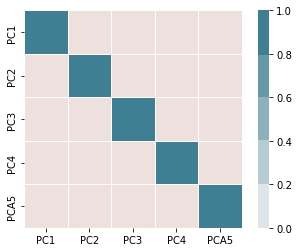

In [411]:
 import seaborn as sns
cor_mat = sns.heatmap(corr,
 center = 0,
 cmap = sns.diverging_palette(20,220, n = 10),
 square = True,
 linewidths = 0.5)

**Figure 1.2.6 Correlation Matrix**  *Not displaying correctly.

The PCA analysis found that setting the PCA to 0.95 required 22 components, which does give reduced components but it is too many to be principle components. 

I found that reducing the n_components to 0.7 gives us a more reflective 5 components. The variance remains relatively high at 0.36 indicating a slightly weaker relationship than having 22 components, but satisfactory.

The correlation table should show the correlation between the components is strong, in order for us to identify further relationships.

#### <font color = blue> Task A Summary. </font> <br>

There are many functions that allow a comprehensive analysis of the initial dataset, from .info() to 
The variables in the Covid Deaths data are not aligned with the Covid Symptom data by state as there is not a unique identifier in both, making any correlations merely assuptions. Therefore it is decided to use only the Symptom data for modelling.

Within the Symptom data, percentage of cli is a mean of 0.7% over 12000 samples.
While Fatigue had a mean of 15% over just 50,000 samples.
Although the variables are not directly linked to each other by State or date yet, this overview supports the hypothesis that fatigue is a strong early indicator of Covid.
It could also be explained by many other factors causing fatigue that are un-related to Covid, so other all variables should be analysed.

On reflection, the scaling and the skewness need to be corrected in the variables before they can be sucessfully processed, first looking to remove any redundant features.

## <font color = blue> Task B - Unsupervised Machine Learning. </font>

#### <font color = blue> K-Means clustering model. </font> <br>

Using the scaled version of the State database (State_ss)and applying K Means clustering, to return 5 clusters.


In [438]:
from sklearn.cluster import KMeans 
#State_ss.info()


In [505]:
#km1_ss = KMeans(n_clusters = 5, max_iter = 20, verbose = 1) .fit(State_ss)
#int(km1_ss)

It can be seen that the KMeans cluster algorithm  has trained and fit in 10 cycles. It starts with 3 clusters or centroids, then proceeds to find the nearest neighbour, and updates the centroid of those, and repeats.
Max iteration tells it when to stop. 
We can see from the results that inertia, or distance x between datapoints starts very high and reduces to an end point in each iteration, as the nearest neighbour is learned.

In [439]:
#km1_ss.cluster_centers_

In [440]:
km1_ss.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [441]:
km1_ss.inertia_

4391971.288376645

**Findings**

Usng the KMeans algorithm, the result for inertia (distance) was too high at 6million with just 2 clusters, so the number of clusters was incrementally changed  and the inertia reduced, until it reached an 'elbow' at 4.1 million with 5 clusters (same number of clusters as PCA returned), so we will use 5 clusters as the optimal for this dataset.


In [442]:
#Visualising the clusters in colour coded scatter plots.
rgb = np.array(['v', 'p', 'b','g','y']) 
rgb

array(['v', 'p', 'b', 'g', 'y'], dtype='<U1')

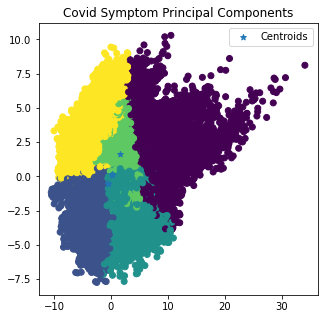

In [444]:
f, ax = plt.subplots(figsize=(5, 5))
ax.scatter(State_ss_pca.iloc[:, 0], State_ss_pca.iloc[:, 1], c = km1_ss.labels_.astype(float))
ax.scatter(km1_ss.cluster_centers_[:, 0], km1_ss.cluster_centers_[:, 1], marker = '*', label = 'Centroids')
ax.set_title("Covid Symptom Principal Components")
ax.legend(loc='best')

**Fig 1.2.7 Scatter plot of 5 Principal components.** 

This shows that there is one central cluster with 4 directly related to the centre, which would suggest that the centre cluster is the most significant as a predictor Feature. 
It is also noteable that the uppermost cluster is highly distributed, possibly indicating a weaker relationship with the other clusters, and more unique variables.

#### <font color = blue> Agglomerative Hierarchical Cluster. </font> <br>

In [371]:
from sklearn.cluster import AgglomerativeClustering

In [372]:
State_ss = data.to_numpy()
State_ss

array([[ 3.16394232,  3.03012651,  1.56684951, ...,  0.21920836,
         0.89785955, -0.7863772 ],
       [ 3.56702604,  3.42100829,  1.85139854, ...,  0.32157217,
         1.33063726, -0.79489772],
       [ 3.4611189 ,  3.31830712,  1.28616439, ...,  0.19184407,
         1.55398196, -1.00296591],
       ...,
       [ 0.59699643,  0.45305669,  0.56085417, ...,  0.37498603,
        -0.11776358, -0.15680906],
       [ 0.29851772,  0.31050971,  0.29969557, ...,  0.27742243,
        -0.04916704, -0.17432525],
       [ 0.47734452,  0.52966166,  0.50800147, ...,  0.22070651,
        -0.0491534 , -0.2079966 ]])

In [446]:
x = State_ss()
cluster = AgglomerativeClustering(n_clusters = 6)
cluster.fit_predict(x)

cluster.discrete_scatter(x[:,0], x[:,1], assignment)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6'], loc = 'best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

TypeError: 'DataFrame' object is not callable

*Unable to sucessfully complete this part but I would expect to find that the resulting Dendogram would highlight 2 'master' clusters'

#### <font color = blue> Task B - Conclusions. </font> <br>

K-Means clustering as an unsupervised model is easy to use however both unsupervised algorithms rely on the user to decide the number of clusters. There are however many metrics in the scikit package to assist decision making.

Relating the cluster utput back to the initial research question, back calculation will be required to identify which cluster(s) Fatigue is in. It could be in all of them which would not help answer our questionwith regards to early symptoms. We should explore more supervised algorithms and their relationship via test ans train datasets.


However, the above five clusters could possibly be linked to 5 different 'type' of covid because each will have a different cluster of symptoms. Further research into the outcome for patients in each cluster might help us decide on the best type of treatment, reducing death rates.



### <font color = blue> Task C - Supervised Machine Learning - Predicting Covid like illness. </font>

#### <font color = blue> Linear Regression Analysis. </font> <br>

For Supervised learning, we will try to use two different algorithms on the same dataset to test and train. We will then determine the most effective model for these variables.

First we use the sklearn package to split the cleaned dataset into a test and train set.

In [448]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [449]:
State_ss.head()

,smoothed_pct_cli_weighted,smoothed_pct_ili_weighted,smoothed_pct_cli_anosmia_ageusia_weighted,smoothed_pct_hh_cli_weighted,smoothed_pct_cmnty_cli_weighted,smoothed_pct_worried_finances_weighted,smoothed_pct_hh_fever_weighted,smoothed_pct_hh_sore_throat_weighted,smoothed_pct_hh_cough_weighted,smoothed_pct_hh_shortness_of_breath_weighted,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,3.163942,3.030127,1.566850,0.192888,0.992892,1.636831,0.648720,0.907904,0.070525,0.444491,...,-0.851568,-0.562221,-0.974575,-1.620836,1.809093,-1.017941,-0.196139,0.219208,0.897860,-0.786377
1,3.567026,3.421008,1.851399,0.340607,1.096487,1.574733,-0.027921,0.251983,0.212610,0.751282,...,-0.851568,-0.306439,-1.136018,-1.758666,1.191539,-1.001262,-0.087778,0.321572,1.330637,-0.794898
2,3.461119,3.318307,1.286164,1.018710,1.091436,1.511225,0.578347,0.021791,0.775810,-0.559593,...,-0.851568,-0.881383,-1.136018,-1.737652,1.072046,-1.198457,0.066972,0.191844,1.553982,-1.002966
3,3.343493,3.204241,1.215510,0.957466,1.081663,1.670872,0.523591,-0.032785,0.545716,0.084653,...,-0.851568,-0.673291,-0.956986,-1.687304,2.488632,-1.198457,0.114913,0.445277,1.095510,-0.750217
4,0.886794,0.821911,-0.519383,-0.927724,0.464412,1.608071,-1.161888,-1.244012,-0.412520,-1.144923,...,-0.851568,-0.817274,-0.947479,-1.558386,2.458175,-1.198457,-0.844632,0.025610,1.034500,-0.741302


**Fig 3.1 Header table with pre-processed US data .**

In [451]:
#Creating a predictor variable dataframe subset using the iloc function.

Covid_pred = State_ss.iloc[:,1:48]
#Covid_pred.info()

In [452]:
#Creating the Target variable as a second subset with one columnn only, using the loc function to call the column name.

Covid_targ = State_ss.loc[:,['smoothed_pct_cli_weighted']]
Covid_targ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162691 entries, 0 to 162690
Data columns (total 1 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   smoothed_pct_cli_weighted  162691 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [453]:
print (Covid_targ.min(), Covid_targ.max() )

smoothed_pct_cli_weighted   -1.202557
dtype: float64 smoothed_pct_cli_weighted    13.860274
dtype: float64


Now we are ready to split the predictor variables into a test and train dataset, using the sklearn package.

In [454]:
from sklearn.model_selection import train_test_split

In [455]:
#30% of the dataset is assigned to test data, leaving 70% to train, for best accuracy, and applying a fixed random state to start.

x_covid_train, x_covid_test, y_covid_train, y_covid_test = train_test_split(Covid_pred, Covid_targ, test_size = 0.3, random_state = 123)

In [456]:
y_covid_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48808 entries, 82233 to 118234
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   smoothed_pct_cli_weighted  48808 non-null  float64
dtypes: float64(1)
memory usage: 762.6 KB


Used .info() to check each of the 4 new sets are of the correct type and shape, no issues.

Next we can map the test and train data to a linear regression model

where x is the predictor variable and y is the target variable.

In [457]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(x_covid_train,y_covid_train)
linReg

LinearRegression()

In [458]:
#The predicted variable results.

linReg.coef_

array([[ 5.15821708e-01,  5.36299835e-01,  2.32045620e-01,
         1.73667506e-03,  2.56345697e-02, -2.03927529e-01,
        -1.39557763e-02, -3.35824642e-02, -3.26525552e-02,
        -1.88098200e-02,  4.81990663e-03, -2.60704849e-04,
         2.74058389e-01,  2.48613729e-02,  3.69657219e-02,
         3.39625472e-02, -3.38114012e-03,  5.25602130e-03,
         7.78026536e-04,  2.88490819e-03, -3.11331262e-02,
         1.58000962e-02,  5.73159482e-03,  1.41060721e-02,
        -3.74054115e-01, -2.20828452e-04,  3.86084786e-03,
        -4.06180410e-02,  1.11624701e-03,  1.20250541e-03,
        -9.66909396e-04, -1.29814069e-03,  3.45693223e-03,
        -1.13831853e-03,  1.36780594e-02, -4.26635022e-03,
        -9.10847664e-04, -4.60498862e-03, -1.53041163e-02,
        -4.96348414e-03,  1.66899091e-03,  6.81336155e-02,
         7.59213497e-03, -2.69521458e-03,  2.06081760e-03,
         2.74978674e-03,  7.12909354e-02]])

**Findings**

The 'Fatigue' variable that was investigated in the EDA as a strong relationship, here is the 17th variable with a coefficient of 3.69, one of the highest. This Adds to the evidence that Fatigue is a strong early indicator of the onset of Covid.


Here are the linear regression coefficients for each predictor variable.

We can see that the first value % Influenza Like Illness has a very high positive value indicating that there is a significant correlation between Flu like illnesses and Covid like illnesses.



In [459]:
#Determining the y intercept point (which is low).

linReg.intercept_

array([0.00018654])

#### <font color = blue> Model Evaluation. </font> <br>

We can use several different metrics to evaluate the model by comparing the error between the results and the original test values.

In [460]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [503]:
#Measuring the effectiveness of the predicting model, 
#r the Mean Squared error of the prediction vs the actual values.
#The result is 0.4 which is closer to zero than to one and indicates reasonable accuracy.

#linReg_MSE = mean_squared_error(y_covid_test, Covid_pred)
#linReg_MSE

In [234]:
#The max error could be skewing the MSE result, but the max error here is 4, which is not exceptional.

from sklearn.metrics import max_error
max_error(y_covid_test, pred_linReg)

4.088340881306259

In [229]:
#The Mean Absolute error of the prediction vs the actual pre-scaled values.
#The result is 0.11 which is a good result as it is closer to 0 than 1, indicating minimal errors.

linReg_MAE = mean_absolute_error(y_covid_test, pred_linReg)
linReg_MAE

0.11751880121433844

In [235]:
#The Mean Squared error of the prediction returns the squared values vs the actual values.
#The mean of which is is 0.04, again, a very good result indicating low errors.

linReg_MSE = mean_squared_error(y_covid_test, pred_linReg)
linReg_MSE

0.040299227657063105

In [238]:
#And finally, the standard metric for linear regression r2_score.
#A score of 0.95 is close to 1 and therefore indicates a strong gooodness of fit, indicating that future measures 
#will also be accurate.

from sklearn.metrics import r2_score
linReg_r2 = r2_score(y_covid_test, pred_linReg)
linReg_r2 

0.9598861873781198

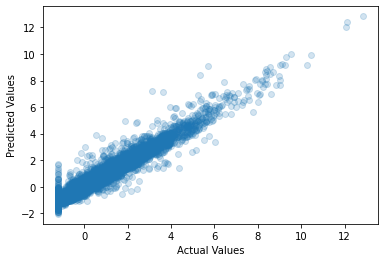

In [242]:
from matplotlib import pyplot as mpl
%matplotlib inline
mpl.scatter(x = y_covid_test, y = pred_linReg, alpha = 0.2)
mpl.title = ('Linear Regression - Actual vs Predicted')
mpl.xlabel('Actual Values')
mpl.ylabel('Predicted Values')
mpl.show()

**Figure 1.11 Predicted values from Linear Regression model.**

This is a good correlation result given that the performance of x=y has minimal variance, except for the 0 to -2 area, and +7, which may be improved with applying more transformaton to the skewed input variables.

Reflecting on the findings of the EDA, This indicates that focussing on the 49 symptoms will produce a reliable prediction if a person is likely to have a Covid like illness or not.




#### <font color = blue> Logistic Regression via Classification model. </font> <br>

In [463]:
#Starting with a copy of the earlier cleaned dataset
State_class = State_ss.copy()
State_class.head()


,smoothed_pct_cli_weighted,smoothed_pct_ili_weighted,smoothed_pct_cli_anosmia_ageusia_weighted,smoothed_pct_hh_cli_weighted,smoothed_pct_cmnty_cli_weighted,smoothed_pct_worried_finances_weighted,smoothed_pct_hh_fever_weighted,smoothed_pct_hh_sore_throat_weighted,smoothed_pct_hh_cough_weighted,smoothed_pct_hh_shortness_of_breath_weighted,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
0,3.163942,3.030127,1.566850,0.192888,0.992892,1.636831,0.648720,0.907904,0.070525,0.444491,...,-0.851568,-0.562221,-0.974575,-1.620836,1.809093,-1.017941,-0.196139,0.219208,0.897860,-0.786377
1,3.567026,3.421008,1.851399,0.340607,1.096487,1.574733,-0.027921,0.251983,0.212610,0.751282,...,-0.851568,-0.306439,-1.136018,-1.758666,1.191539,-1.001262,-0.087778,0.321572,1.330637,-0.794898
2,3.461119,3.318307,1.286164,1.018710,1.091436,1.511225,0.578347,0.021791,0.775810,-0.559593,...,-0.851568,-0.881383,-1.136018,-1.737652,1.072046,-1.198457,0.066972,0.191844,1.553982,-1.002966
3,3.343493,3.204241,1.215510,0.957466,1.081663,1.670872,0.523591,-0.032785,0.545716,0.084653,...,-0.851568,-0.673291,-0.956986,-1.687304,2.488632,-1.198457,0.114913,0.445277,1.095510,-0.750217
4,0.886794,0.821911,-0.519383,-0.927724,0.464412,1.608071,-1.161888,-1.244012,-0.412520,-1.144923,...,-0.851568,-0.817274,-0.947479,-1.558386,2.458175,-1.198457,-0.844632,0.025610,1.034500,-0.741302


**Fig 1.1.3 Original variables to be classified.**

This time we will classify the cli target variable as a binary classification, using a panda binning or .cut function.


Where 1 = Covid like illness,
and 0 = not Covid like illness.

The range of cli is -1.2 to 13.8, so the mid-point will be at 6.3

In [464]:
#Finding the range to be cut.
print (Covid_targ.min(), Covid_targ.max() )

smoothed_pct_cli_weighted   -1.202557
dtype: float64 smoothed_pct_cli_weighted    13.860274
dtype: float64


In [465]:
#Converting to an array of 2.
import numpy as np
Covid_array = np.linspace(min_value,max_value,2)
Covid_array

array([[-1.20255677],
       [13.86027361]])

In [478]:
##Defining labels for the array.
labels = ['0', '1']

In [494]:
# Putting is together to create 2 bins.

#Covid_array.columns = [x[0] for x in Covid_array.columns]
#Covid_bins = pd.qcut(['Covid_array'], 2, labels=labels)
                                                   
#print(Covid_bins)

In [487]:
print(Covid_array)

[[-1.20255677]
 [13.86027361]]


In [488]:
Covid_array.shape
#2 rows 1 clm

(2, 1)

In [474]:
#Target remains as
Covid_targ=Covid_targ.astype(int)
print (Covid_targ.min(), Covid_targ.max() )


smoothed_pct_cli_weighted   -1
dtype: int32 smoothed_pct_cli_weighted    13
dtype: int32


In [475]:
# predictor variable remains as 
Covid_pred.head()

,smoothed_pct_ili_weighted,smoothed_pct_cli_anosmia_ageusia_weighted,smoothed_pct_hh_cli_weighted,smoothed_pct_cmnty_cli_weighted,smoothed_pct_worried_finances_weighted,smoothed_pct_hh_fever_weighted,smoothed_pct_hh_sore_throat_weighted,smoothed_pct_hh_cough_weighted,smoothed_pct_hh_shortness_of_breath_weighted,smoothed_pct_hh_difficulty_breathing_weighted,...,smoothed_pct_contact_covid_positive_weighted,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted
0,3.030127,1.566850,0.192888,0.992892,1.636831,0.648720,0.907904,0.070525,0.444491,0.066838,...,0.472457,-0.851568,-0.562221,-0.974575,-1.620836,1.809093,-1.017941,-0.196139,0.219208,0.897860
1,3.421008,1.851399,0.340607,1.096487,1.574733,-0.027921,0.251983,0.212610,0.751282,0.303558,...,0.646623,-0.851568,-0.306439,-1.136018,-1.758666,1.191539,-1.001262,-0.087778,0.321572,1.330637
2,3.318307,1.286164,1.018710,1.091436,1.511225,0.578347,0.021791,0.775810,-0.559593,-0.623401,...,0.667097,-0.851568,-0.881383,-1.136018,-1.737652,1.072046,-1.198457,0.066972,0.191844,1.553982
3,3.204241,1.215510,0.957466,1.081663,1.670872,0.523591,-0.032785,0.545716,0.084653,-0.098619,...,0.878860,-0.851568,-0.673291,-0.956986,-1.687304,2.488632,-1.198457,0.114913,0.445277,1.095510
4,0.821911,-0.519383,-0.927724,0.464412,1.608071,-1.161888,-1.244012,-0.412520,-1.144923,-1.375456,...,-0.477328,-0.851568,-0.817274,-0.947479,-1.558386,2.458175,-1.198457,-0.844632,0.025610,1.034500


*Unable to get the logistic regression to run due to the binning of cli.

-The next steps would be 
model.predict_proba(x)

#### <font color = blue> Task C Conclusions. </font> <br>
Linear regression, with the right scaling and pre-processing is straight forward. It also has many metrics to assist in decision making.

With this model we can quantify the relationship between cli and other sysmptoms.

Logistic Regression is more involved and therefore more room for errors but it has the flexibility of being able to process both linear and logistic data.



### <font color = blue> Task D - Research Summary, Final Conclusions,LImitations and Recommendations. </font>

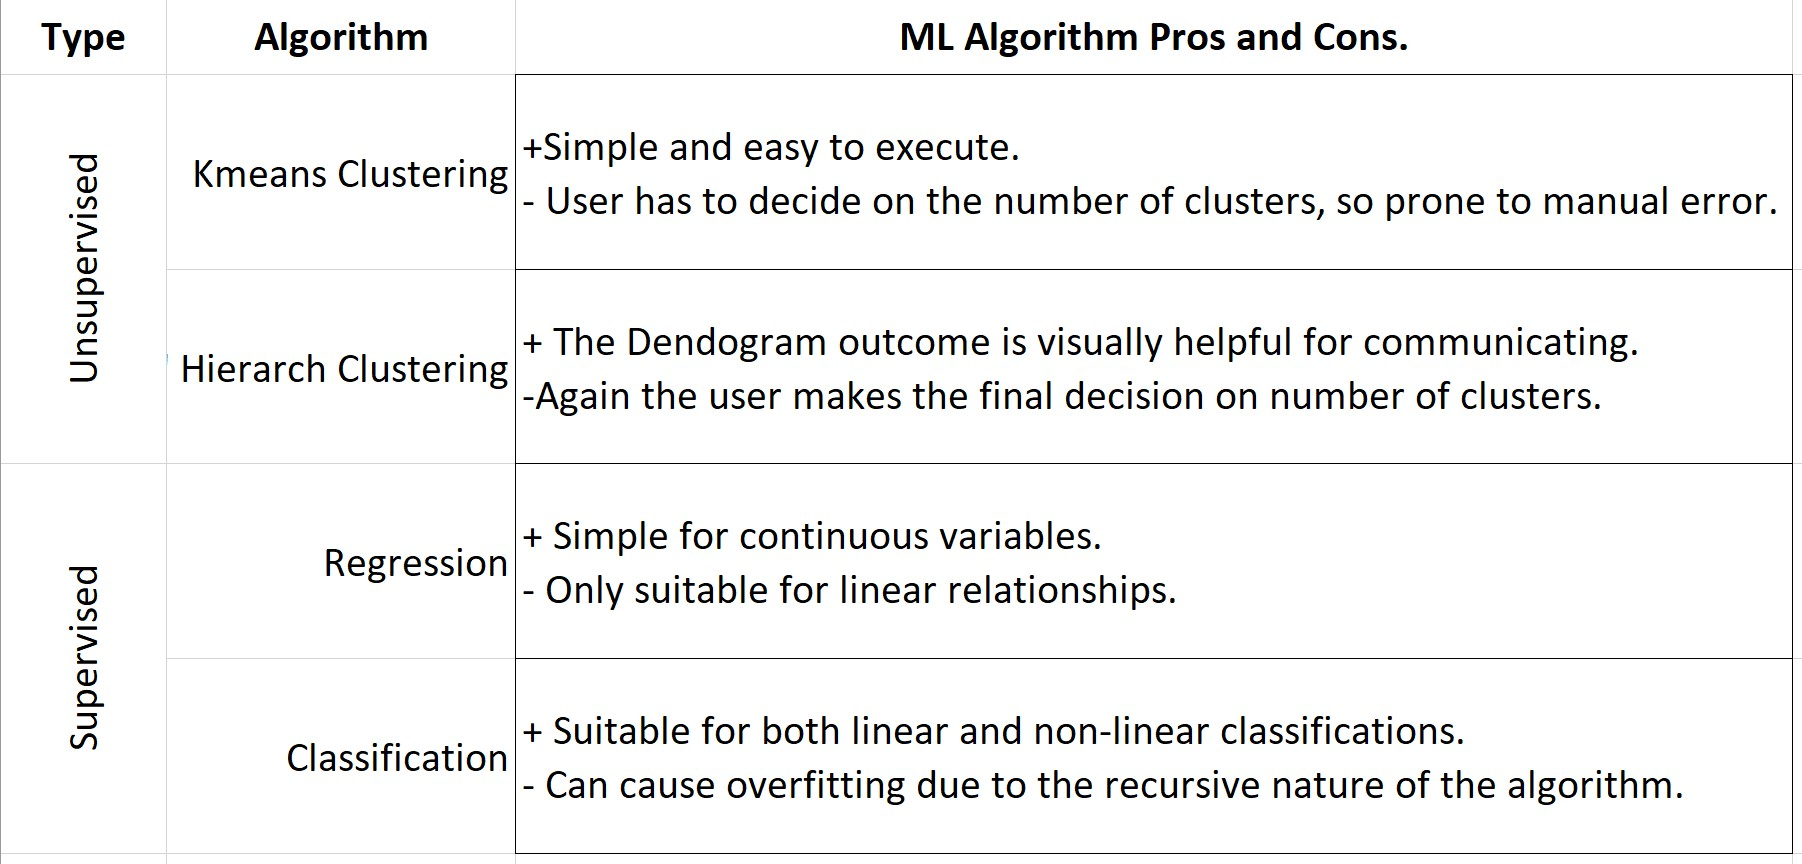

In [497]:
from IPython.display import Image
PATH = "C:/Users/tina_/Downloads/"
Image(filename = PATH + "Algo pros.jpg", width=700, height=700)

Having explored 4 types of ML algorithm in depth, several advantages and disadvantages of each model's application become apparant as detailed in fig 4.1.

It is important to select the right model for the problem, so using more than one is a recommended approach.

The most effective model to answer out research question regarding specific symptoms detecting Covid early, was the supervised linear regression, because as mentioned previously, the metrics allow us to quantify the relationship with the parameters. To conclude, further analysis is required to focus on the Fatigue sysmptom and it's place in the algorithm.

There are also many more algorithms to explore and learn, LASSO, SVM, ridge regression, LARS etc. ( Avila, J. and Hauck, T , C 2017, Scikit-learn Cookbook 2nd Edition, Pakt Press, Mumbai.

Also, Cross validation has not been explored within the scope of the report, but it is a recommended final method to cross - check the effectiveness with a new, unseen dataset, with known outcomes, and verify if the model is procuding true or false positives or negatives.

There are limitations experienced with machine learning. As the data processing is not live but in 'batches' This means that any change to the data would mean re-running the process. Which with a larger, constantly changing dataset, ML would not be suitable. Maybe AI would?

